In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.graphics import correlation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [44]:
df = pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Visualizing the data

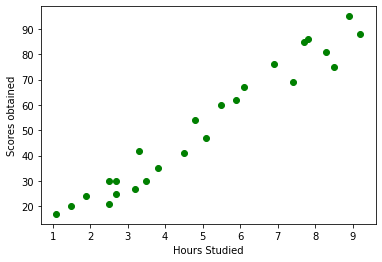

In [45]:
plt.scatter(df['Hours'],df['Scores'],color = 'green')
plt.xlabel('Hours Studied')
plt.ylabel('Scores obtained')
plt.show()

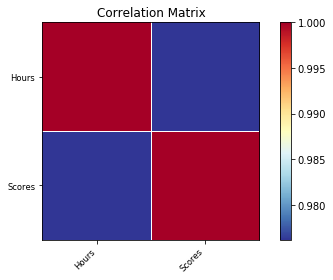

In [46]:
fig = correlation.plot_corr(df.corr(),xnames = df.columns,ynames = df.columns)
plt.show(fig)

In [47]:
df.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [48]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [77]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
print('Intercept - ',lr.intercept_)
print("Coefficient of x - ",lr.coef_)


Intercept -  2.138438931036845
Coefficient of x -  [9.79991115]


In [79]:
y_pred = lr.predict(X_test.reshape(-1,1))
score = r2_score(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared = False)
print("R^2 Score - ",score)
print("Root Mean Squared Error - ",rmse)

R^2 Score -  0.9499676441650258
Root Mean Squared Error -  5.89155728004674


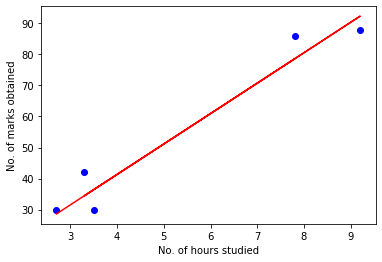

In [53]:
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_test,y_pred,color = 'red')
plt.xlabel('No. of hours studied')
plt.ylabel('No. of marks obtained')
plt.show()

Ridge Regression

In [54]:
ridgeReg = Ridge()
ridgeReg.fit(X_train.reshape(-1,1),y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
from pprint import pprint
pprint(ridgeReg.get_params().keys())

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])


In [56]:
parameters = {
    'alpha': [0.1,0.5,0.01,0.05,5,10]
}
rr = GridSearchCV(ridgeReg,parameters,n_jobs = -1)
rr.fit(X_train.reshape(-1,1),y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 0.01, 0.05, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
pred = rr.predict(X_test.reshape(-1,1))
score = r2_score(y_test,pred)
rmse = mean_squared_error(y_test,pred,squared = False)
print("R^2 Score - ",score)
print("Root Mean Squared Error - ",rmse)

R^2 Score -  0.9490502713434048
Root Mean Squared Error -  5.945324528804083


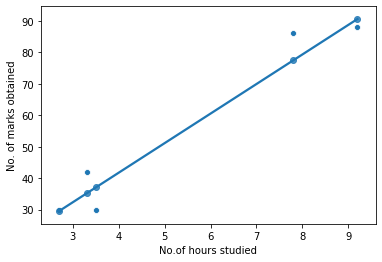

In [58]:
sns.scatterplot(X_test,y_test)
sns.regplot(X_test,pred)
plt.xlabel('No.of hours studied')
plt.ylabel('No. of marks obtained')
plt.show()

In [ ]:
Using an ensemble method GradientBoostingRegressor

In [59]:
gbr = GradientBoostingRegressor()

In [60]:
gbr.fit(X_train.reshape(-1,1),y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
#Without Hyperparameter Tuning
prediction = gbr.predict(X_test.reshape(-1,1))
score = r2_score(y_test,prediction)
rmse = mean_squared_error(y_test,prediction,squared = False)
print("R^2 Score - ",score)
print("Root Mean Squared Error - ",rmse)

R^2 Score -  0.9112226553042695
Root Mean Squared Error -  7.8479405359692915


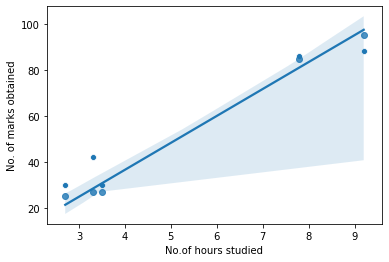

In [62]:
sns.scatterplot(X_test,y_test)
sns.regplot(X_test,prediction)
plt.xlabel('No.of hours studied')
plt.ylabel('No. of marks obtained')
plt.show()

In [ ]:
Regression using Neural Networks

In [63]:
import warnings
warnings.filterwarnings("ignore",category = FutureWarning)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
model = Sequential()
model.add(Dense(4096,kernel_initializer = 'normal',input_dim = 1,activation = 'relu'))
model.add(Dense(4096,kernel_initializer = 'normal',activation = 'relu'))
model.add(Dense(1,activation = 'linear'))
    
model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['mean_absolute_error'])
model.summary() 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 4096)              8192      
_________________________________________________________________
dense_19 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 4097      
Total params: 16,793,601
Trainable params: 16,793,601
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(X_train,y_train,epochs = 100,batch_size = 50)

Epoch 1/100
20/20 [==============================] - 2s 122ms/sample - loss: 3122.1055 - mean_absolute_error: 50.3667
Epoch 2/100
20/20 [==============================] - 1s 31ms/sample - loss: 1478.0022 - mean_absolute_error: 34.5904
Epoch 3/100
20/20 [==============================] - 0s 22ms/sample - loss: 605.1060 - mean_absolute_error: 21.9478
Epoch 4/100
20/20 [==============================] - 0s 25ms/sample - loss: 144.5656 - mean_absolute_error: 10.0388
Epoch 5/100
20/20 [==============================] - 0s 17ms/sample - loss: 33.2428 - mean_absolute_error: 4.8685
Epoch 6/100
20/20 [==============================] - 0s 16ms/sample - loss: 216.1122 - mean_absolute_error: 12.3502
Epoch 7/100
20/20 [==============================] - 0s 16ms/sample - loss: 443.3257 - mean_absolute_error: 18.1681
Epoch 8/100
20/20 [==============================] - 0s 16ms/sample - loss: 510.4401 - mean_absolute_error: 19.5529
Epoch 9/100
20/20 [==============================] - 0s 12ms/sample - l

In [66]:
results = model.evaluate(X_test,y_test,batch_size = 5)
print('Test loss, Test mean absolute accuracy',results)

5/5 [==============================] - 0s 89ms/sample - loss: 36.1410 - mean_absolute_error: 5.6817
Test loss, Test mean absolute accuracy [36.140953063964844, 5.681677]


In [67]:
result = model.predict(X_test)

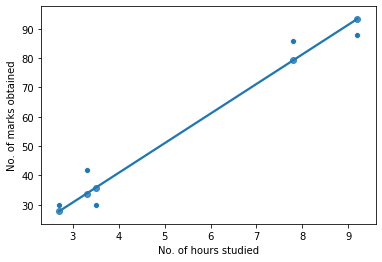

In [68]:
sns.scatterplot(X_test,y_test)
sns.regplot(X_test,result)
plt.xlabel('No. of hours studied')
plt.ylabel('No. of marks obtained')
plt.show()

In [69]:
print("R^2 Score ",r2_score(y_test,result))
print("Root Mean Squared Error - ",mean_squared_error(y_test,result,squared = False))

R^2 Score  0.9479056576956145
Root Mean Squared Error -  6.011736098423687


Predicting the score of a student if he/she puts in 9.25 hours of study in a day?  

In [80]:
print("The amount of marks a student if he/she studies for 9.25 hours a day is ",lr.predict([[9.25]]))

The amount of marks a student if he/she studies for 9.25 hours a day is  [92.78761705]


Ridge Regression

In [74]:
print("The amount of marks a student if he/she studies for 9.25 hours a day is ",rr.predict([[9.25]]))

The amount of marks a student if he/she studies for 9.25 hours a day is  [91.05724797]


Gradient Boosting Regressor

In [75]:
print("The amount of marks a student if he/she studies for 9.25 hours a day is ",gbr.predict([[9.25]]))

The amount of marks a student if he/she studies for 9.25 hours a day is  [94.98834343]


Neural Network

In [81]:
print("The amount of marks a student if he/she studies for 9.25 hours a day is ",model.predict([9.25]))

The amount of marks a student if he/she studies for 9.25 hours a day is  [[93.91803]]
